# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exploratory Data Analysis - Homework

The aim of this notebook is to give you an exercise to perform an exploratory data analysis in order to extract some useful information hidden in data.

We are going to analyse the [Tennis dataset](http://tennis-data.co.uk). In order to guide your analysis, you should try to approach the problem by wondering some questions. The role of the analysis is to find the answers.

In [1]:
# Import Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob # fa cicli for su contenuto della cartella
logging.getLogger().setLevel('INFO')

## Helpers

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Problem description

### The data
The website​ [​http://tennis-data.co.uk/alldata.php​](​http://tennis-data.co.uk/alldata.php​) gathers outcomes of both WTA​ (Women Tennis Association)​ and ATP ​(Association of Tennis Professionals - men only)​ tennis games over several years.
A short description of each variable can be found here : [http://www.tennis-data.co.uk/notes.txt](http://www.tennis-data.co.uk/notes.txt)

### What is expected from you
First of all, answer the following questions.

#### Questions
Please answer the following questions about the dataset with the appropriate line(s) of code.

##### Example

__Question​__: How many ATP matches are there in the dataset? 

__Answer​__: 
```python
len(df_atp)
```

1. Who are the three ATP players with the most wins ?
2. How many sets did the player “​Federer R.” win in total ?
3. How many sets did the player “​Federer R.” win during the years 2016 and 2017 ?
4. For each match, what is the percentage of victories of the winner in the past ?
5. How are (differently) distributed wins of players in the age segments `[16-23]`, `[24-30]` `[30+]`?
6. Does the behaviour in the previous answer changes between men and women?

_Hint_: Careful with null values and how you handle them.

#### Bonus points

* your notebook contains graphics that are both interesting and pretty
* we can go through your entire notebook without frowning
* you teach us something cool 🙂

#### Free Analysis

We would like you to perform some free analysis. For example study distributions, correlations, etc.

---

## Your Work

Have fun!

In [4]:
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# First I use lower an both the dataframes' columns, also creating a column with the year in which each match 
# was played (I'll need it in a while). Then I create a copy of both of the dataframes.

df_atp.columns = [col.lower() for col in df_atp]
df_wta.columns = [col.lower() for col in df_wta]

df_atp['year'] = df_atp['date'].dt.year
df_wta['year'] = df_wta['date'].dt.year

df_atp_original = df_atp.copy()
df_wta_original = df_wta.copy()

#### 1 Who are the three ATP players with the most wins ?

In [6]:
df_atp.groupby('winner').count()['atp'].sort_values(ascending=False)

winner
Federer R.     1121
Nadal R.        891
Djokovic N.     802
Ferrer D.       691
Murray A.       624
               ... 
Melo D.           1
Mecir M.          1
Mcclune M.        1
Mayer L.          1
Lammer M.         1
Name: atp, Length: 948, dtype: int64

#### 2 How many sets did the player “Federer R.” win in total ?

In [7]:
won_sets_as_winner = df_atp[df_atp['winner']=='Federer R.']['wsets'].sum()

won_sets_as_winner

2546.0

In [8]:
# I noticed that a value in the lsets column contains a " ` ", so i created this function to get rid of it.
 
def punctuation_deleter(x):   
    if type(x)==int or type(x)==float:
        return x
    else:
        return int(x.replace('`',''))

In [9]:
df_atp['lsets']=df_atp['lsets'].apply(punctuation_deleter)

In [10]:
won_sets_as_loser = df_atp[df_atp['loser']=='Federer R.']['lsets'].sum()

won_sets_as_loser

150.0

In [11]:
won_sets_total = won_sets_as_loser + won_sets_as_winner

won_sets_total

2696.0

#### 3 How many sets did the player “Federer R.” win during the years 2016 and 2017 ?

In [12]:
df_atp[((df_atp['year']== 2016) | (df_atp['year'] == 2017)) & (df_atp['winner']=='Federer R.')].groupby('year')['wsets'].sum() + df_atp[((df_atp['year']== 2016) | (df_atp['year'] == 2017)) & (df_atp['loser']=='Federer R.')].groupby('year')['lsets'].sum()

year
2016     58.0
2017    124.0
dtype: float64

#### 4 For each match, what is the percentage of victories of the winner in the past ?

In [13]:
df_atp = df_atp.dropna(subset=['avgw'])

df_atp['avgw_past'] = df_atp['avgw'].apply(lambda x: round(1/x,2))

df_atp[['date','tournament','winner','loser','avgw_past']].sort_values(by=['winner','date'])

,date,tournament,winner,loser,avgw_past
31726,2011-02-16,Copa Claro,Acasuso J.,Dolgopolov O.,0.23
31732,2011-02-17,Copa Claro,Acasuso J.,Cuevas P.,0.42
47860,2017-04-11,Grand Prix Hassan II,Ahouda A.,Granollers M.,0.07
40779,2014-07-08,SkiStar Swedish Open,Albot R.,De Schepper K.,0.46
44029,2015-09-29,Malaysian Open,Albot R.,Troicki V.,0.28
...,...,...,...,...,...
51189,2018-06-30,Eastbourne International,Zverev M.,Lacko L.,0.65
51407,2018-07-24,BB&T Atlanta Open,Zverev M.,Smyczek T.,0.63
51412,2018-07-25,BB&T Atlanta Open,Zverev M.,Youzhny M.,0.67
51557,2018-08-01,Citi Open,Zverev M.,Smyczek T.,0.64


#### 5 How are (differently) distributed wins of players in the age segments [16-23], [24-30] [30+]?

In [14]:
# Since I did not find any reference to age class in the df_atp I surfed the web and found this dataset, containing 
# ATP players' info, such as birthdate https://www.kaggle.com/datasets/romanzdk/atp-players-overviews

headers = ['player_id','player_slug','first_name','last_name','player_url','flag_code','residence','birthplace','birthdate',
'birth_year','birth_month','birth_day','turned_pro','weight_lbs','weight_kg','height_ft','height_inches','height_cm',
           'handedness','backhand']

df_atp_bio = pd.read_csv('tennis_bio\player_overviews_UNINDEXED.csv',names=headers, parse_dates=['birthdate'])

df_atp_bio.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958-01-13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960-02-02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963-04-25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959-06-15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964-11-13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [15]:
# Here I add a 'name' column to the df_atp_bio so that I can use it to do a merge with the df_atp

df_atp_bio['name']= df_atp_bio['last_name'].str.title() + ' ' + df_atp_bio['first_name'].apply(lambda x: x[0]) + '.'

In [16]:
df_atp_bio_short = df_atp_bio[['name', 'birthdate']]

df_atp_2 = df_atp.merge(df_atp_bio_short.set_index('name'), left_on='winner', right_on='name', how='left', right_index=True)

In [17]:
df_atp_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24275 entries, 29521 to 52297
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   atp         24275 non-null  int64         
 1   location    24275 non-null  object        
 2   tournament  24275 non-null  object        
 3   date        24275 non-null  datetime64[ns]
 4   series      24275 non-null  object        
 5   court       24275 non-null  object        
 6   surface     24275 non-null  object        
 7   round       24275 non-null  object        
 8   best of     24275 non-null  int64         
 9   winner      24275 non-null  object        
 10  loser       24275 non-null  object        
 11  wrank       24269 non-null  object        
 12  lrank       24236 non-null  object        
 13  w1          24128 non-null  float64       
 14  l1          24130 non-null  float64       
 15  w2          23888 non-null  object        
 16  l2          23888 

In [18]:
# There are roughly 2.3k rows with no birthdate, so I drop them.
# I do this because I think there is not a reasonable way to estimate one's birthdate without the right data.

df_atp_2.dropna(subset=['birthdate'], inplace=True)

In [19]:
# I define a function that assigns the age class of a match winner based on his birthdate and the match date

def age_class(birthdate, match_date):
    
    yrs= round((match_date - birthdate)/np.timedelta64(1,'Y'),0)
    
    if yrs <=23 and yrs>=16:
        return '[16-23]'
    elif yrs <=30 and yrs>=24:
        return '[24-30]'
    elif yrs>30:
        return '[30+]'
    else:
        return '[16-]'

In [20]:
# I create the age_class column applying the function I defined previosuly

df_atp_2['age_class'] = df_atp_2.apply(lambda x: age_class(x['birthdate'], x['date']), axis=1)

df_atp_2.groupby('age_class').count()['atp']

age_class
[16-23]     3475
[16-]          5
[24-30]    13263
[30+]       5231
Name: atp, dtype: int64

In [21]:
# Here I prepare a dataframe with age_class, winner, and 
# victory_counter (a winner can be in multiple age_class as he gets older)

df_atp_for_plot = df_atp_2[['age_class','winner','atp']].groupby(['age_class','winner']).count()['atp'].sort_values(ascending=False).reset_index()

df_atp_for_plot.rename(columns={'atp':'victory_counter'},inplace=True)

df_atp_for_plot

,age_class,winner,victory_counter
0,[24-30],Djokovic N.,454
1,[24-30],Nadal R.,376
2,[24-30],Murray A.,367
3,[16-23],Cilic M.,357
4,[30+],Federer R.,356
...,...,...,...
653,[24-30],Venus M.,1
654,[24-30],Vinciguerra A.,1
655,[24-30],Watanuki Y.,1
656,[16-23],Soderlund C.,1


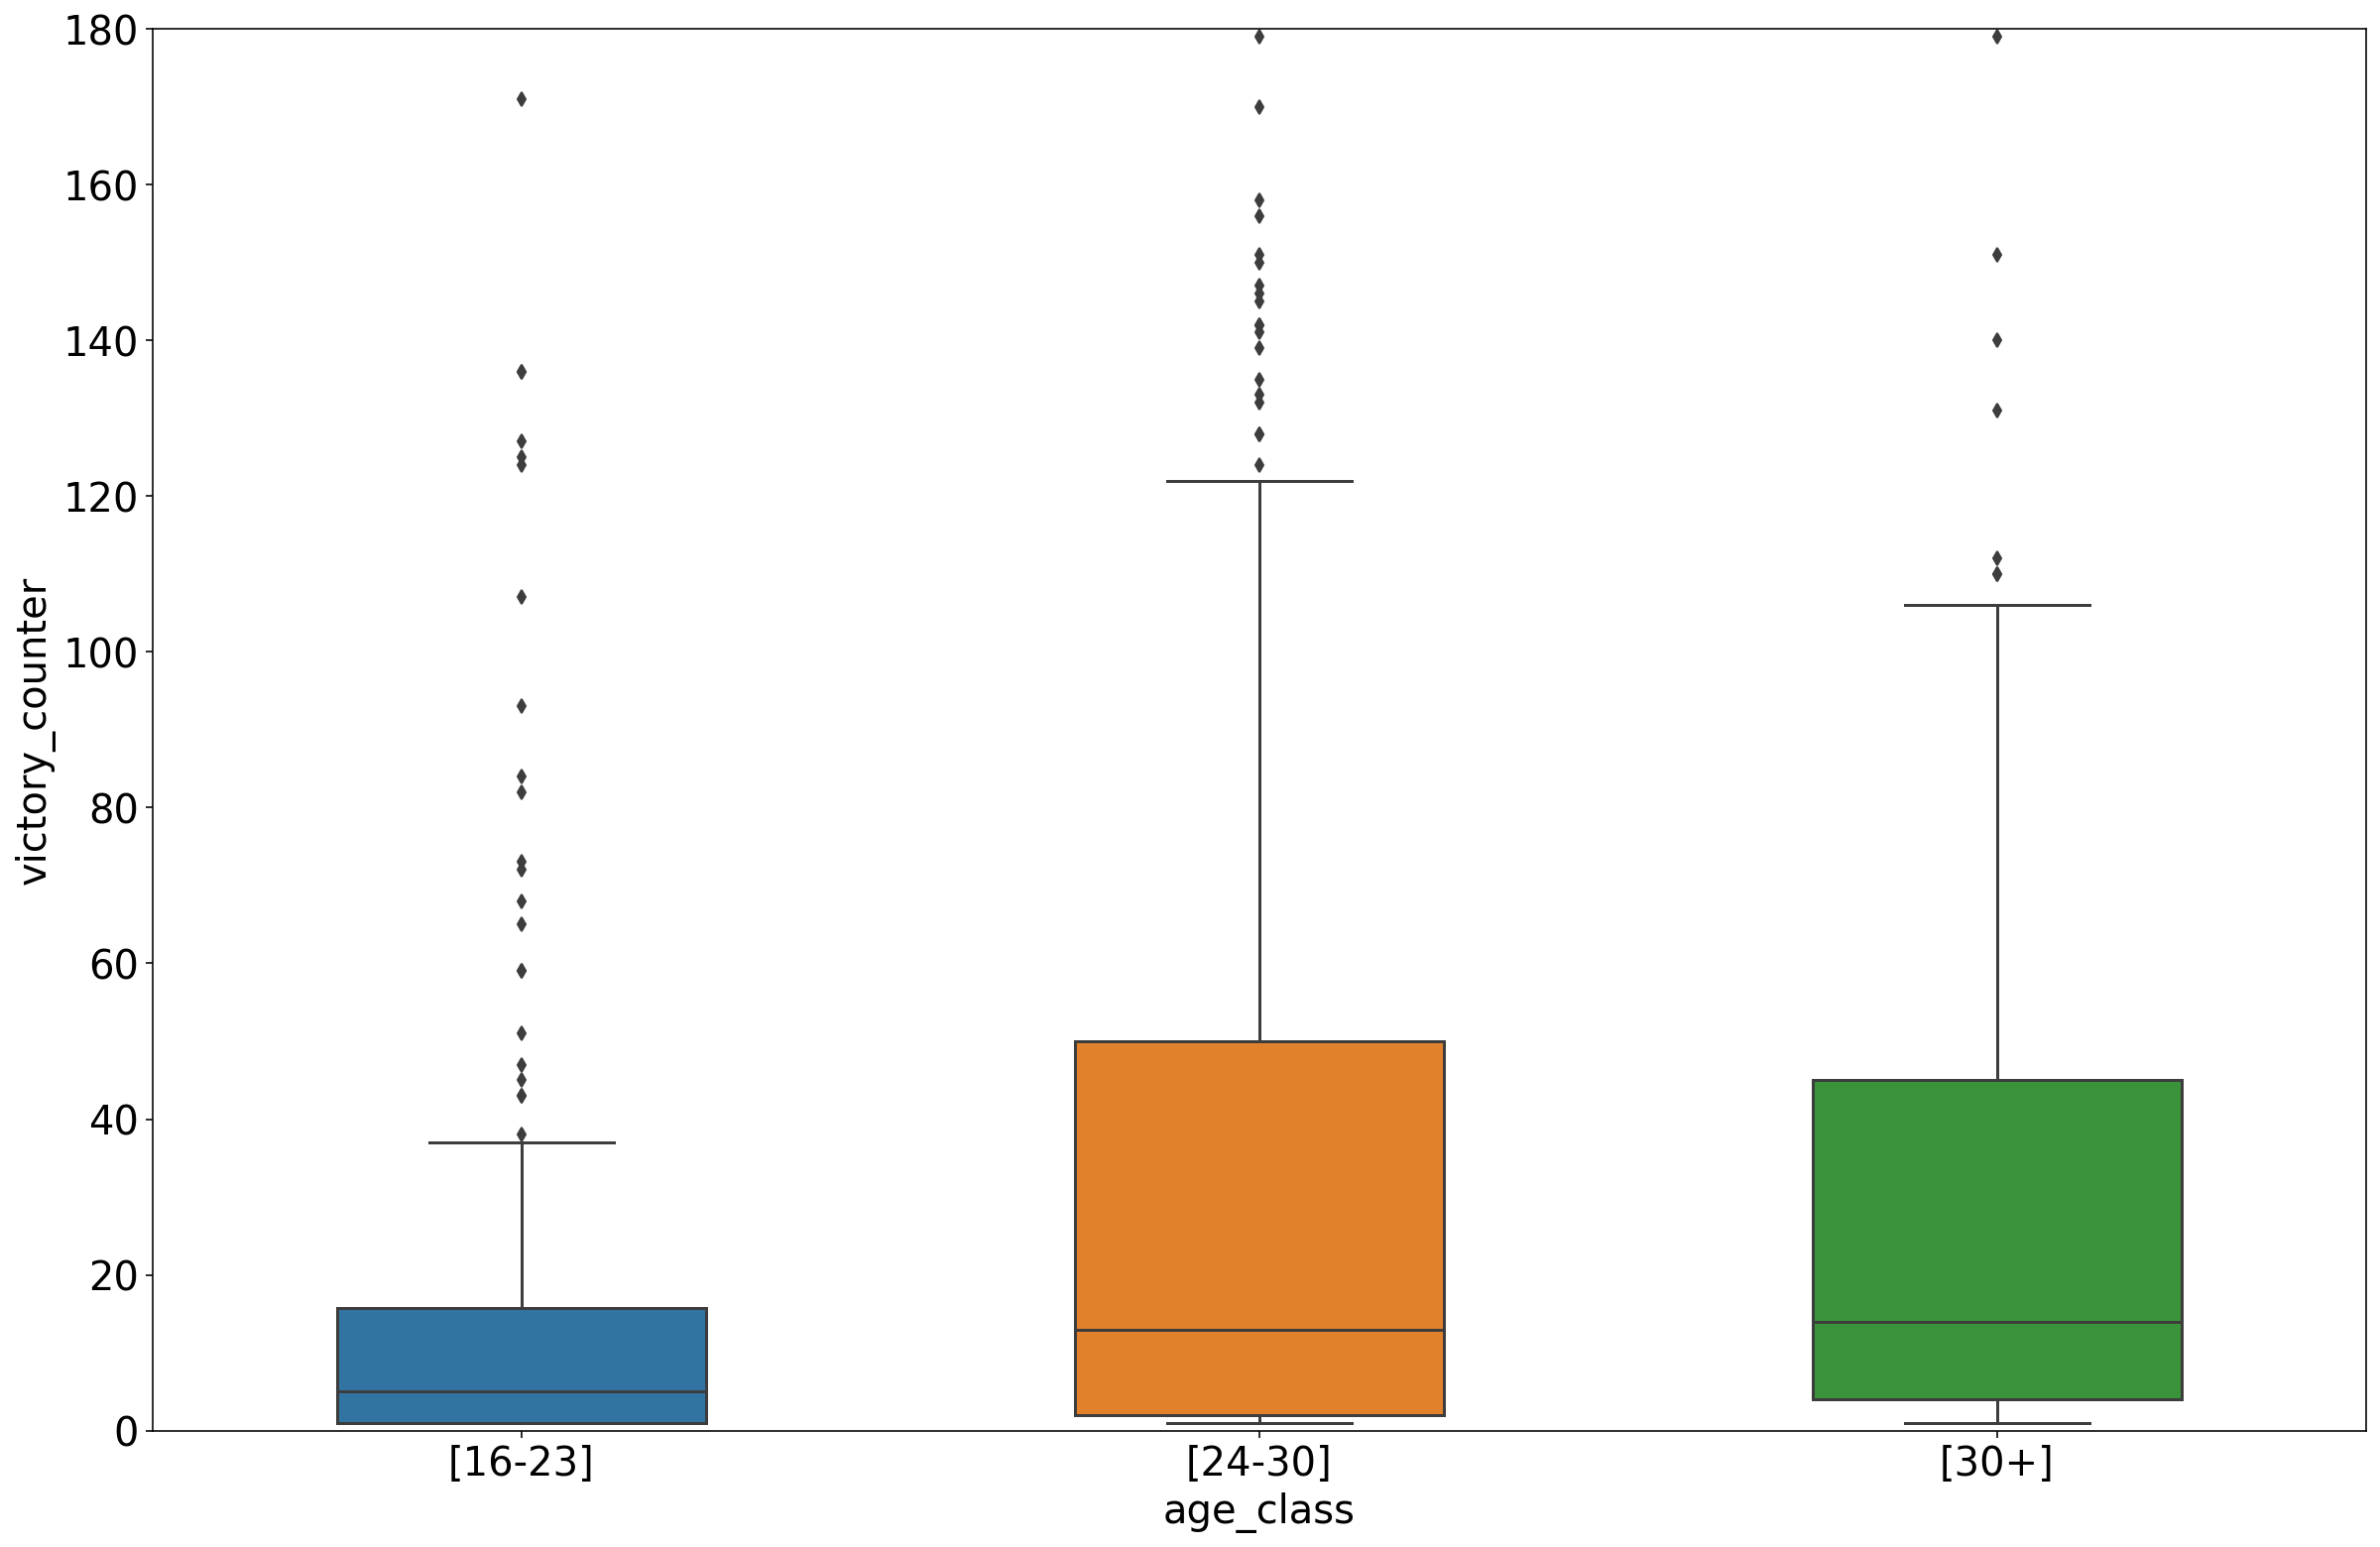

In [22]:
# Here is the boxplot with the distribution of victories, by age_class, for ATP players.
# When players are younger (16-23 yrs) their median victories are below 10, with this number growing as they enter in 
# the other classes (24-30 and 30+). The variability in victories is larger for the 24-30 and 30+ classes.
# In the 24-30 and 30+ age classes we have especially asimmetrical distributions, with 25% of players collecting a variable 
# number of victories (20-50), higher than the median value.  
# All the age classes present many outliers (top performers).

%config InlineBackend.figure_format = "retina" 
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

plt.ylim(0,180)

sns.boxplot(data=df_atp_for_plot,
            x='age_class', 
            y='victory_counter',
           order = ['[16-23]','[24-30]','[30+]'],
           width=0.5);

#### 6 Does the behaviour in the previous answer changes between men and women?

In [23]:
df_wta.head()

,wta,location,tournament,date,tier,court,surface,round,best of,winner,...,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl,year
0,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Sun T.T.,...,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
1,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Dulko G.,...,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
2,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Loit E.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
3,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Craybas J.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Bartoli M.,...,4.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0


In [24]:
# Here I looked for a dataframe containing wta players' birthdates as I didn't find references to dates of birth in the df_wta. 
#https://www.kaggle.com/datasets/joaoevangelista/wta-matches-and-rankings?select=players.csv

df_wta_bio = pd.read_csv('tennis_bio\players_wta.csv', encoding='latin-1',parse_dates=['birth_date'])

df_wta_bio.head()

,player_id,first_name,last_name,hand,birth_date,country_code
0,200001,Martina,Hingis,R,1980-09-30,SUI
1,200002,Mirjana,Lucic,R,1982-03-09,CRO
2,200003,Justine,Henin,R,1982-06-01,BEL
3,200004,Kerry Anne,Guse,R,1972-12-04,AUS
4,200005,Jolene,Watanabe Giltz,R,1968-08-31,USA


In [25]:
df_wta_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20662 entries, 0 to 20661
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   player_id     20662 non-null  int64         
 1   first_name    20654 non-null  object        
 2   last_name     20662 non-null  object        
 3   hand          19708 non-null  object        
 4   birth_date    20144 non-null  datetime64[ns]
 5   country_code  20662 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 968.7+ KB


In [26]:
# I drop rows (8) where I don't have a first_name in the dataset (as I cannot assign names by chance)

df_wta_bio.dropna(subset=['first_name'], inplace=True)

df_wta_bio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20654 entries, 0 to 20661
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   player_id     20654 non-null  int64         
 1   first_name    20654 non-null  object        
 2   last_name     20654 non-null  object        
 3   hand          19700 non-null  object        
 4   birth_date    20144 non-null  datetime64[ns]
 5   country_code  20654 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.1+ MB


In [27]:
# I define a function to create a column name containing the surname and the names' first letters so that I can use 
# this to do the merge with df_wta

def name_compiler(last_name, first_name):
    if ' ' in first_name:
        fn1 = '.'.join([l[0] for l in first_name.split()])
    else:
        fn1 = first_name[0]
    
    return last_name + ' ' + fn1 + '.'  

In [28]:
df_wta_bio['name']=df_wta_bio.apply(lambda x: name_compiler(x['last_name'], x['first_name']), axis=1)

In [29]:
df_wta_bio.head()

,player_id,first_name,last_name,hand,birth_date,country_code,name
0,200001,Martina,Hingis,R,1980-09-30,SUI,Hingis M.
1,200002,Mirjana,Lucic,R,1982-03-09,CRO,Lucic M.
2,200003,Justine,Henin,R,1982-06-01,BEL,Henin J.
3,200004,Kerry Anne,Guse,R,1972-12-04,AUS,Guse K.A.
4,200005,Jolene,Watanabe Giltz,R,1968-08-31,USA,Watanabe Giltz J.


In [30]:
# I do a left merge using the 'name' column (I know that in the wta_df the same names appear written in many different ways so
# I should find a find a function to correct them but this is the best I could do in the time I had).

df_wta_2 = df_wta.merge(df_wta_bio[['name','birth_date']].set_index('name'), left_on='winner', right_on='name', how='left', right_index=True)

In [31]:
# I drop rows with no birth_date and I create the age_class column applying the function I defined previosuly

df_wta_2.dropna(subset=['birth_date'], inplace=True)

df_wta_2['age_class'] = df_wta_2.apply(lambda x: age_class(x['birth_date'], x['date']), axis=1)

In [32]:
# Here I create a wta_df to be used as a base for the boxplot

df_wta_for_plot = df_wta_2[['age_class','winner','wta']].groupby(['age_class','winner']).count()['wta'].reset_index()

df_wta_for_plot.rename(columns={'wta':'victory_counter'}, inplace=True)

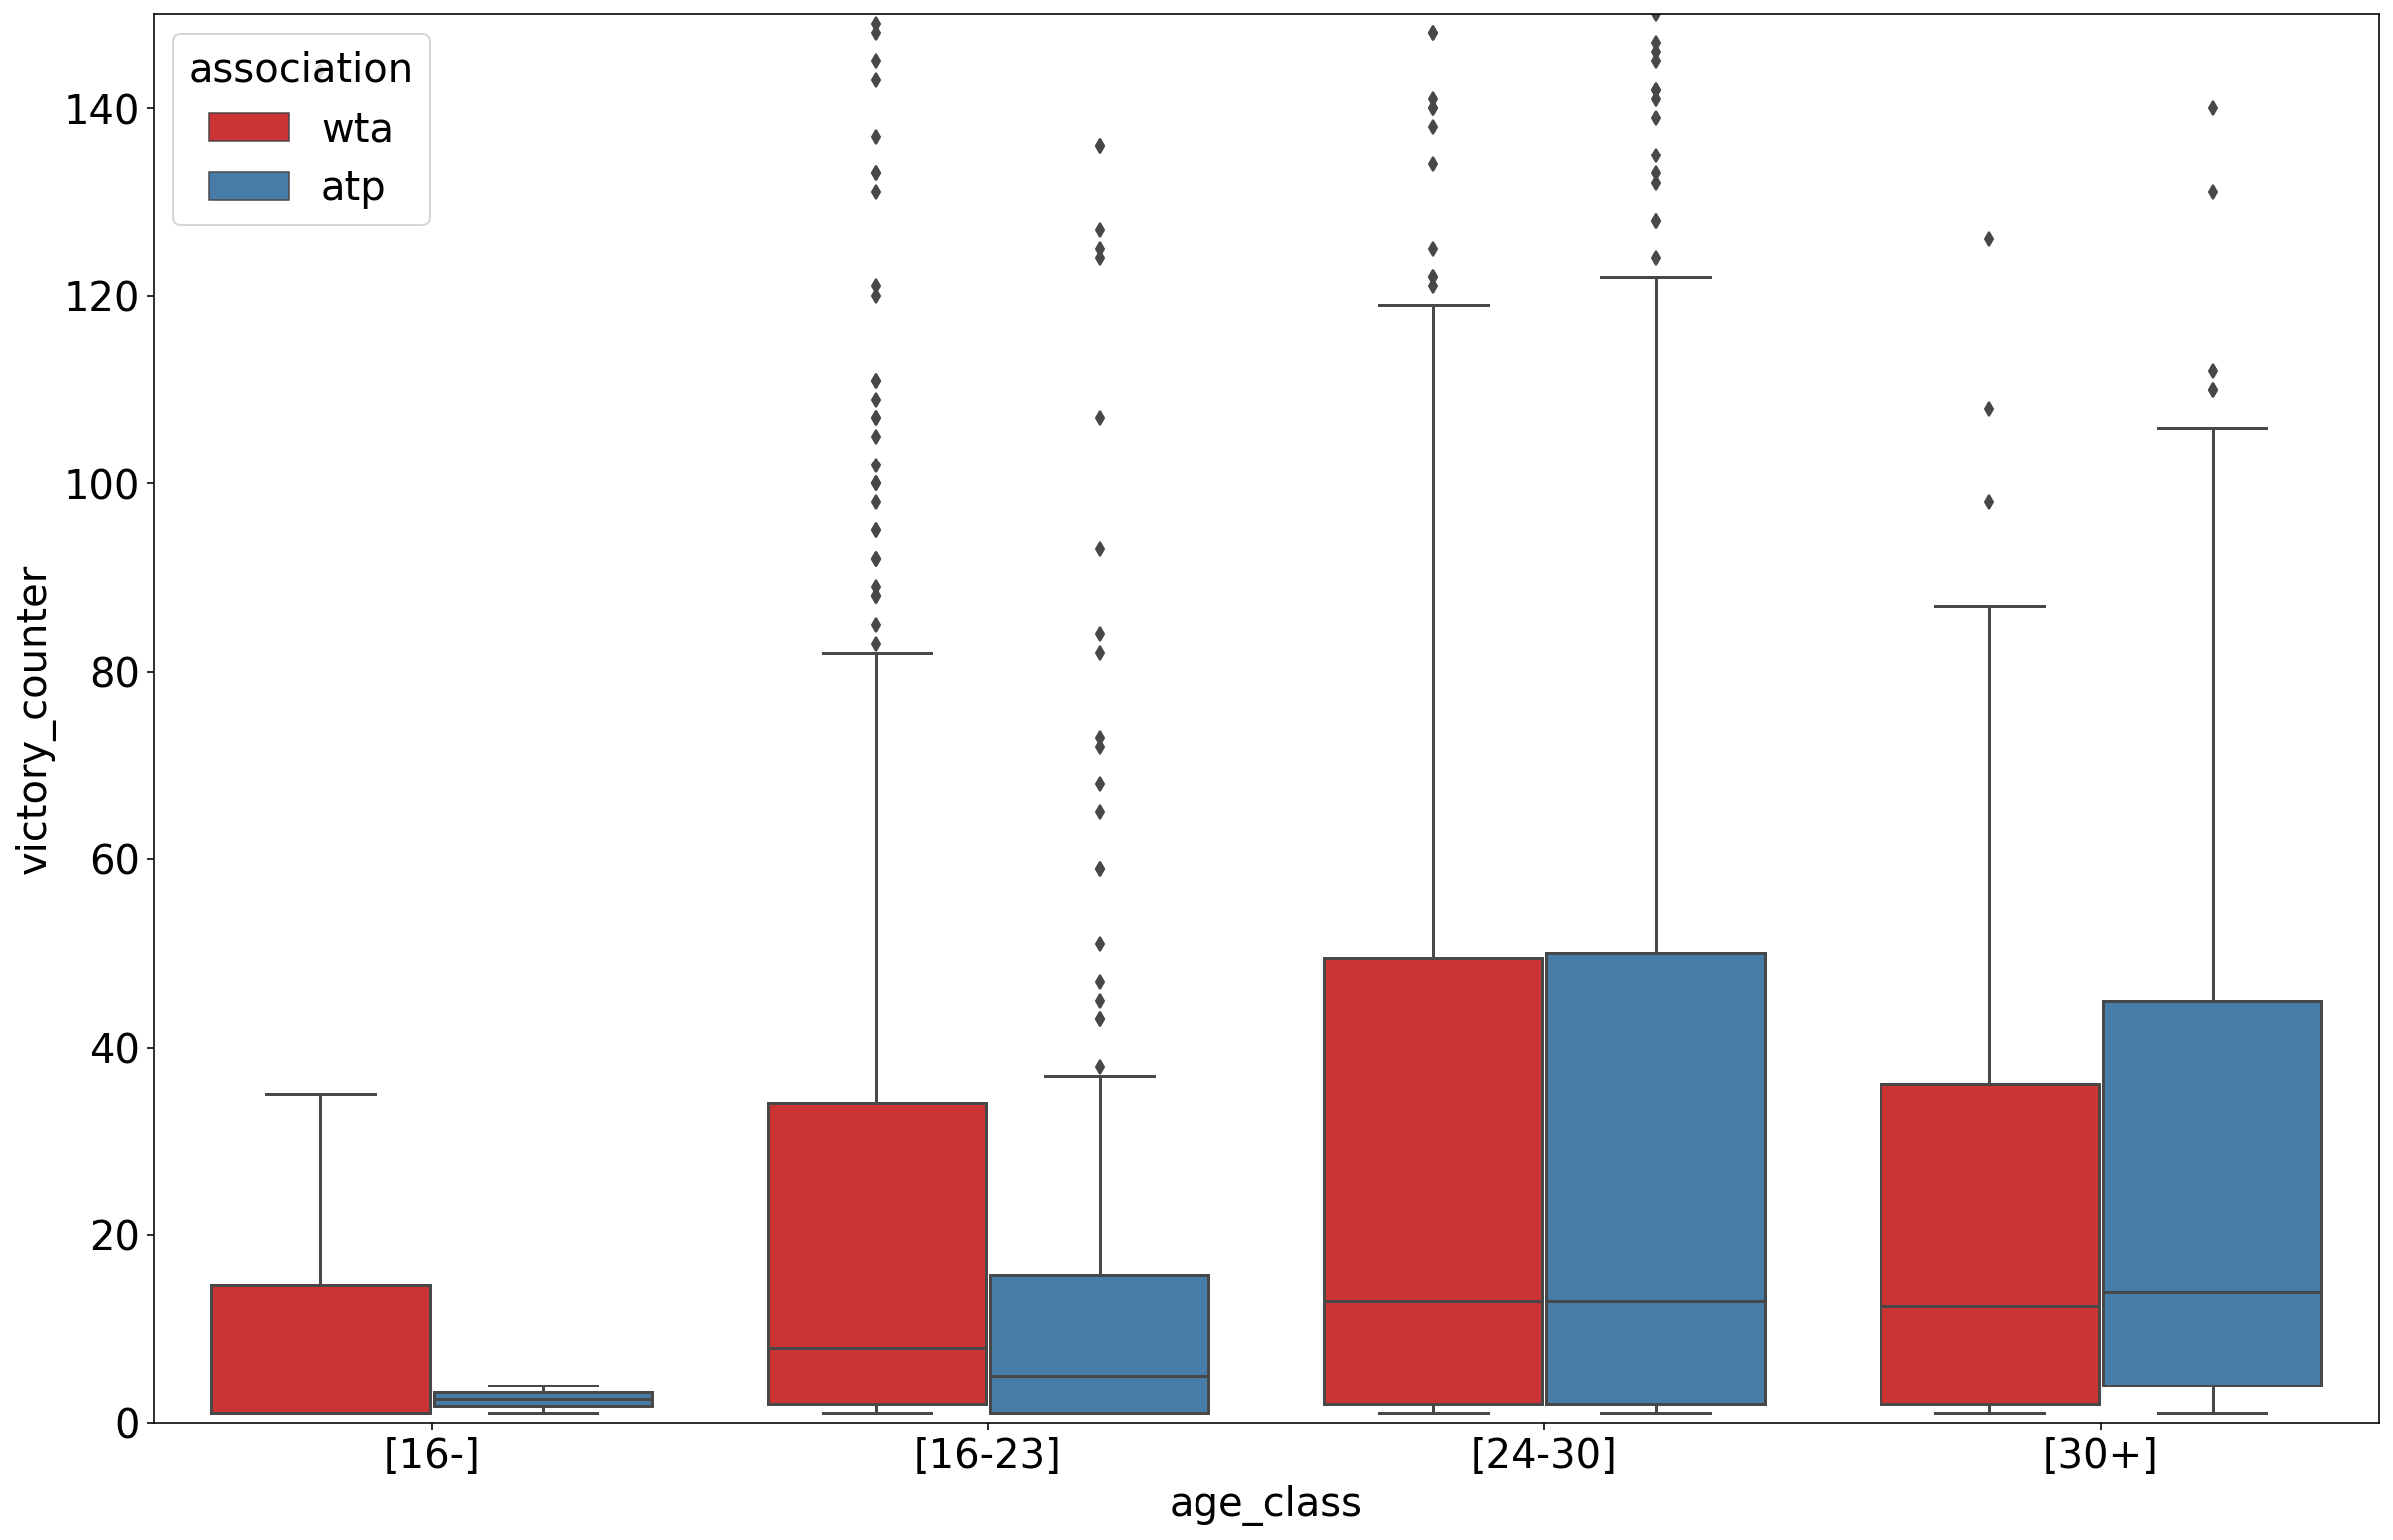

In [33]:
# I compare boxplots for victories across age classes for WTA and ATP players.
# I notice that ATP and WTA players show almost identical performances in the 24-30 age_class.
# In the 16-23 age_class WTA players perform significantly better than ATP players with a higher median value of victories
# and a more asimmetrical distribution distributed towards an higher number of victories.
# In the 30+ age_class ATP players perform slightly better vs WTA players.
# I also included the 16- class, but there are not enough data on the ATP side so a comparison isn't really doable.

df_wta_for_plot['association']='wta'
df_atp_for_plot['association']='atp'

df_for_plot = df_wta_for_plot.append(df_atp_for_plot)


plt.ylim(0,150)

plot1 = sns.boxplot(data=df_for_plot,
            x='age_class',
            y='victory_counter',
            hue='association',
            order=['[16-]','[16-23]','[24-30]','[30+]'],
            palette='Set1')

sns.move_legend(plot1, 'upper left');

## Free Analysis

### 1) I want to study the winning rates of "Federer R", "Djokovic N.", "Nadal R." per year:


In [34]:
df_atp_federer = df_atp_original[(df_atp_original['winner']=='Federer R.') | (df_atp_original['loser']=='Federer R.')]
df_atp_djokovic = df_atp_original[(df_atp_original['winner']=='Djokovic N.') | (df_atp_original['loser']=='Djokovic N.')]
df_atp_nadal = df_atp_original[(df_atp_original['winner']=='Nadal R.') | (df_atp_original['loser']=='Nadal R.')]

df_atp_federer['player']='Federer R.'
df_atp_djokovic['player']='Djokovic N.'
df_atp_nadal['player']='Nadal R.'

df_atp_federer['win']=df_atp_federer['winner'].apply(lambda x: 1 if x=='Federer R.' else 0)
df_atp_djokovic['win']=df_atp_djokovic['winner'].apply(lambda x: 1 if x=='Djokovic N.' else 0)
df_atp_nadal['win']=df_atp_nadal['winner'].apply(lambda x: 1 if x=='Nadal R.' else 0)

df_atp_top3 = df_atp_federer.append(df_atp_djokovic).append(df_atp_nadal).drop_duplicates()

C:\Users\dell\AppData\Local\Temp/ipykernel_144/86155425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atp_federer['player']='Federer R.'
C:\Users\dell\AppData\Local\Temp/ipykernel_144/86155425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atp_djokovic['player']='Djokovic N.'
C:\Users\dell\AppData\Local\Temp/ipykernel_144/86155425.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [35]:
df_atp_top3.head()

,atp,location,tournament,date,series,court,surface,round,best of,winner,...,lbl,sjw,sjl,maxw,maxl,avgw,avgl,year,player,win
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,Federer R.,1
16,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,2nd Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,Federer R.,0
96,4,Auckland,Heineken Open,2000-01-10,International,Outdoor,Hard,1st Round,3,Ferrero J.C.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,Federer R.,0
168,6,Melbourne,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,Federer R.,1
229,6,Melbourne,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,2nd Round,5,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,Federer R.,1


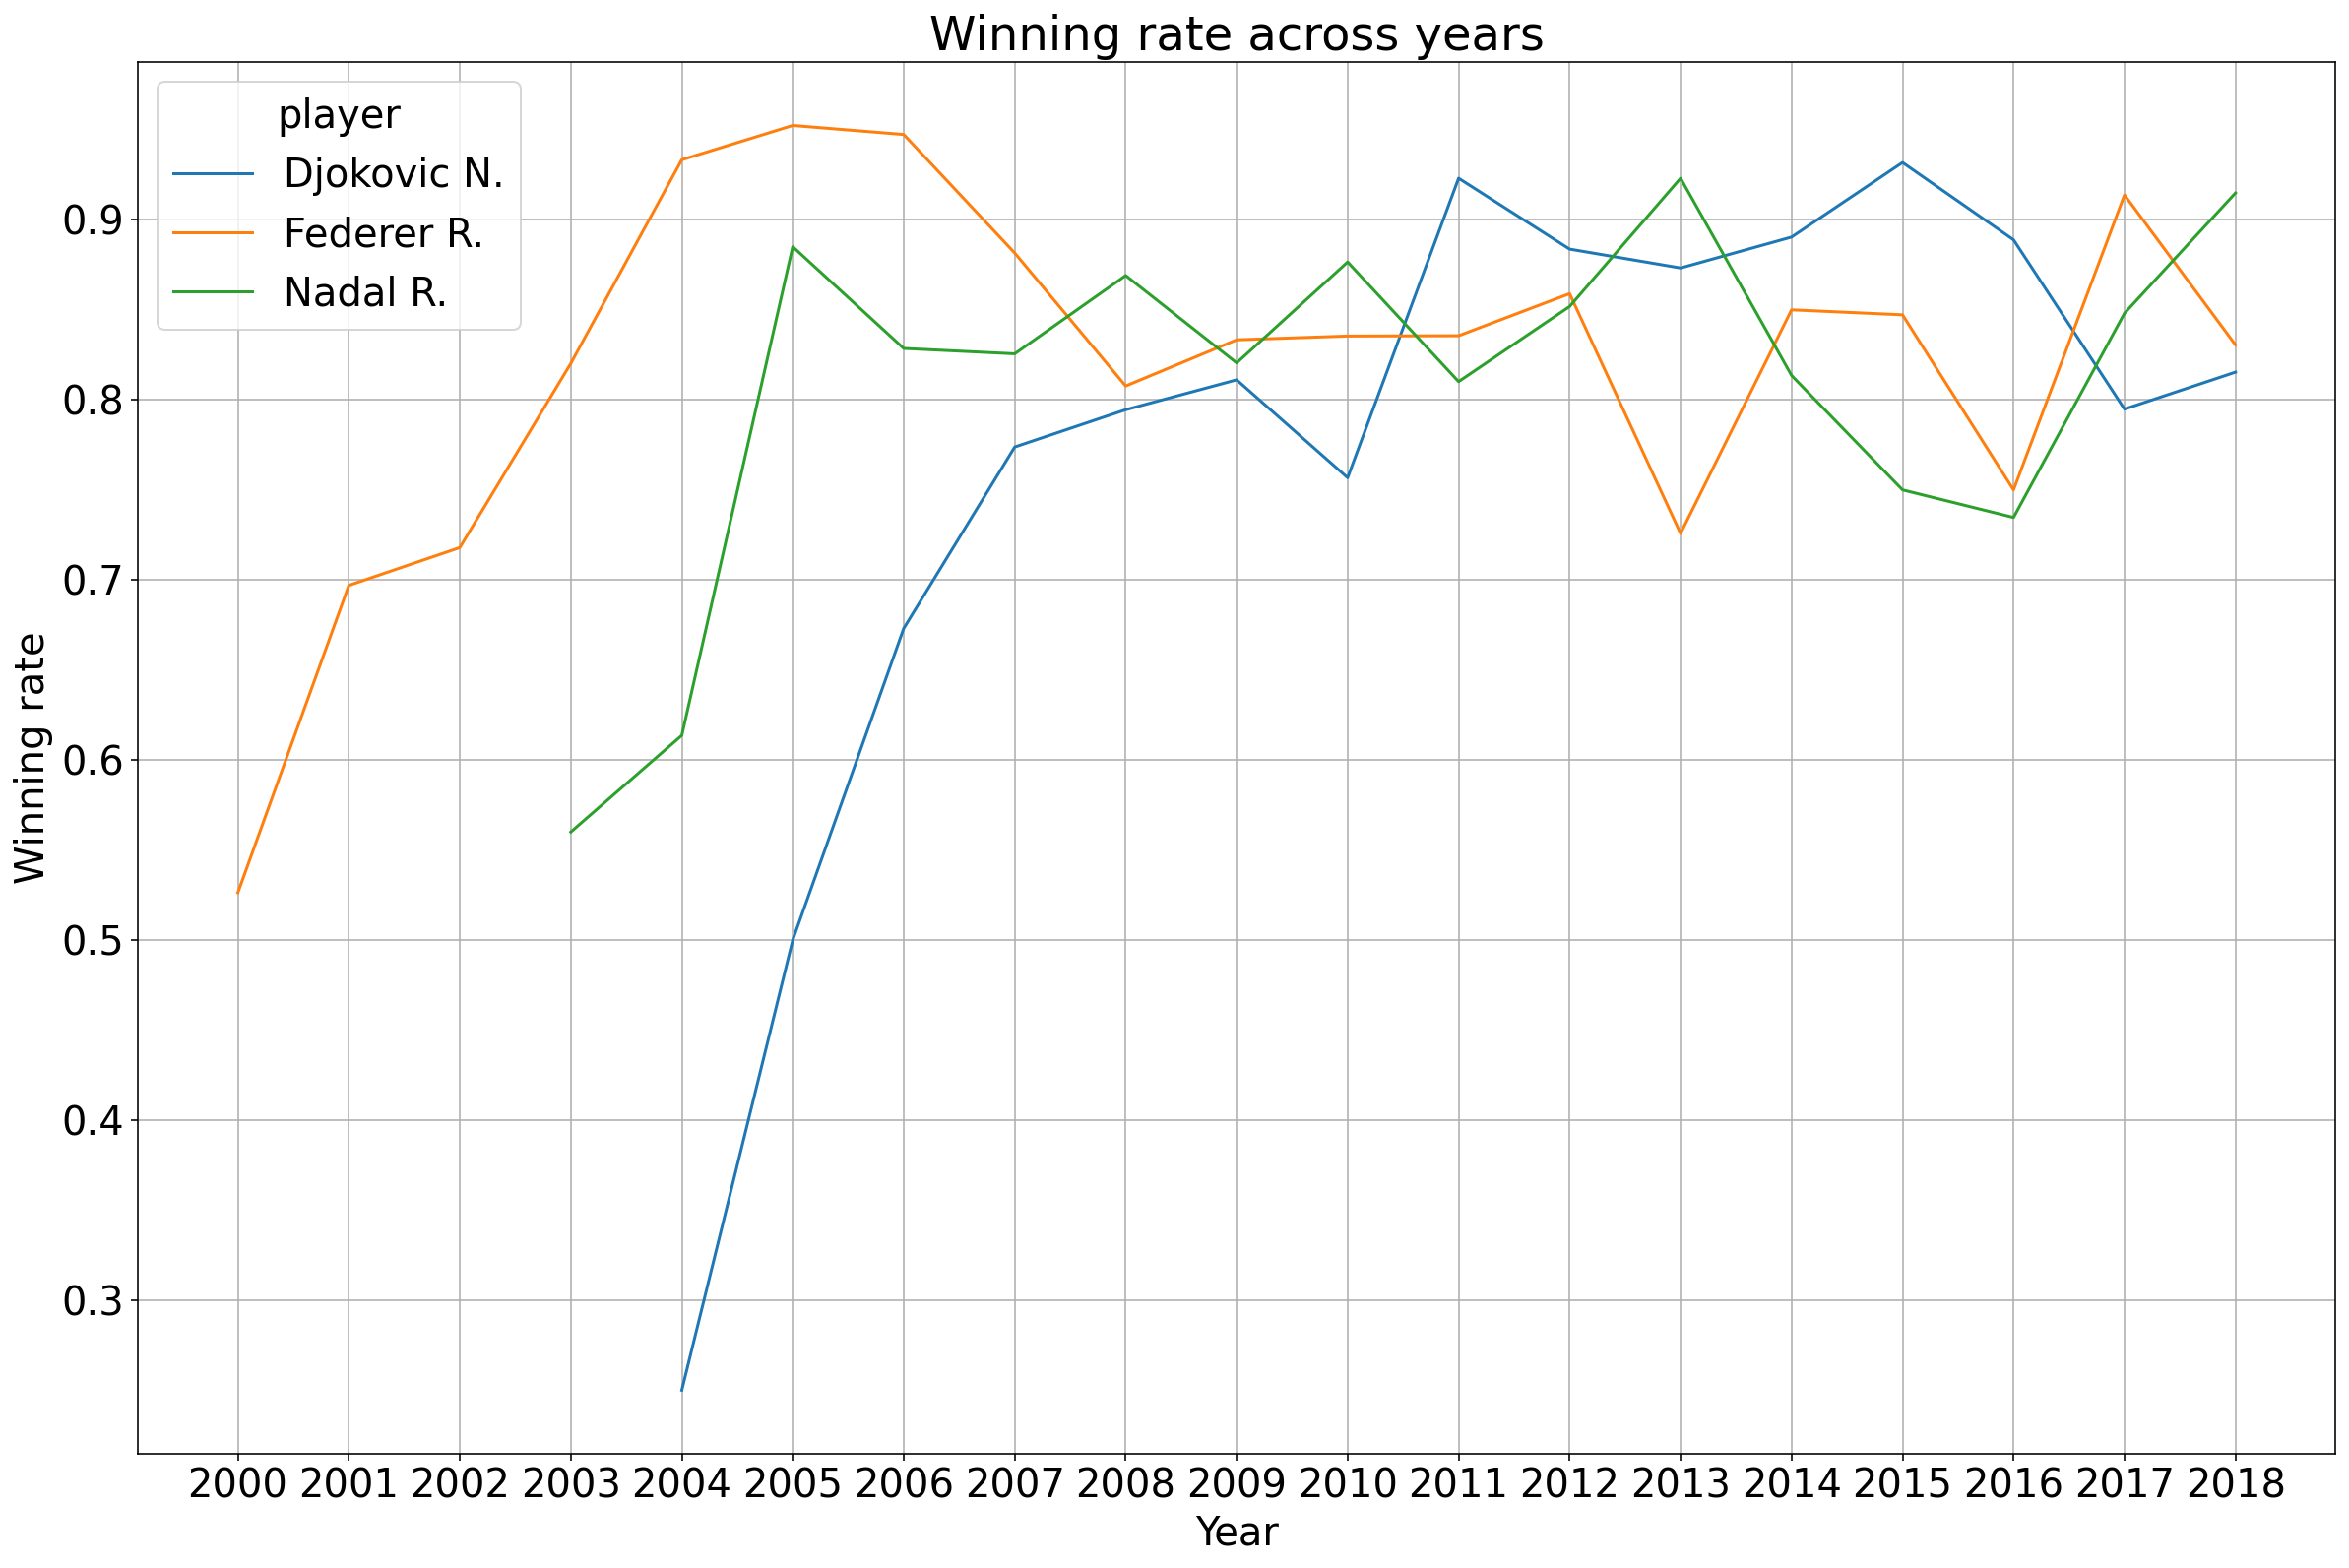

In [36]:
df_atp_top3_for_plot = df_atp_top3[['player', 'year', 'win']].groupby(['player','year'])[['win']].mean()

df_atp_top3_for_plot.reset_index(level=['player', 'year'],inplace=True)

df_atp_top3_for_plot.rename(columns={'win':'winning_rate'}, inplace=True)

plot2 = sns.lineplot(data=df_atp_top3_for_plot,
            x='year',
            y='winning_rate',
            hue='player')

plot2.set_title('Winning rate across years')
plot2.set_xlabel('Year')
plot2.set_ylabel('Winning rate')
plot2.grid()

plt.xticks(range(math.floor(df_atp_top3_for_plot['year'].min()),math.floor(df_atp_top3_for_plot['year'].max()+1)));

# Federer's best years were 2004-2006 when he won over 90% of the played matches.
# Djokovic progressively gained victories, surpassing Federer R. and Nadal R. in 2011
# Nadal had his top years in 2005 and 2013, and despite sub-optimal performances in 2015-2016, he returned stronger in 2018.

### 2) I want to study the winning rates of a specific player across years, by court:

In [37]:
player_of_choice = 'Djokovic N.'

df_atp_player = df_atp_original[(df_atp_original['winner']==f'{player_of_choice}') | (df_atp_original['loser']==f'{player_of_choice}')]

In [38]:
df_atp_player['player_name'] = player_of_choice

df_atp_player['win'] = df_atp_player['winner'].apply(lambda x: 1 if x==player_of_choice else 0)

C:\Users\dell\AppData\Local\Temp/ipykernel_144/469735145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atp_player['player_name'] = player_of_choice
C:\Users\dell\AppData\Local\Temp/ipykernel_144/469735145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atp_player['win'] = df_atp_player['winner'].apply(lambda x: 1 if x==player_of_choice else 0)


In [39]:
# Here I create a dataframe as a base for the plot

df_atp_player_for_plot = df_atp_player[['court','year','win']].groupby(['court','year'])[['win']].mean()

df_atp_player_for_plot.reset_index(level=['court','year'],inplace=True)

df_atp_player_for_plot.rename(columns={'win':'winning_rate'}, inplace=True)

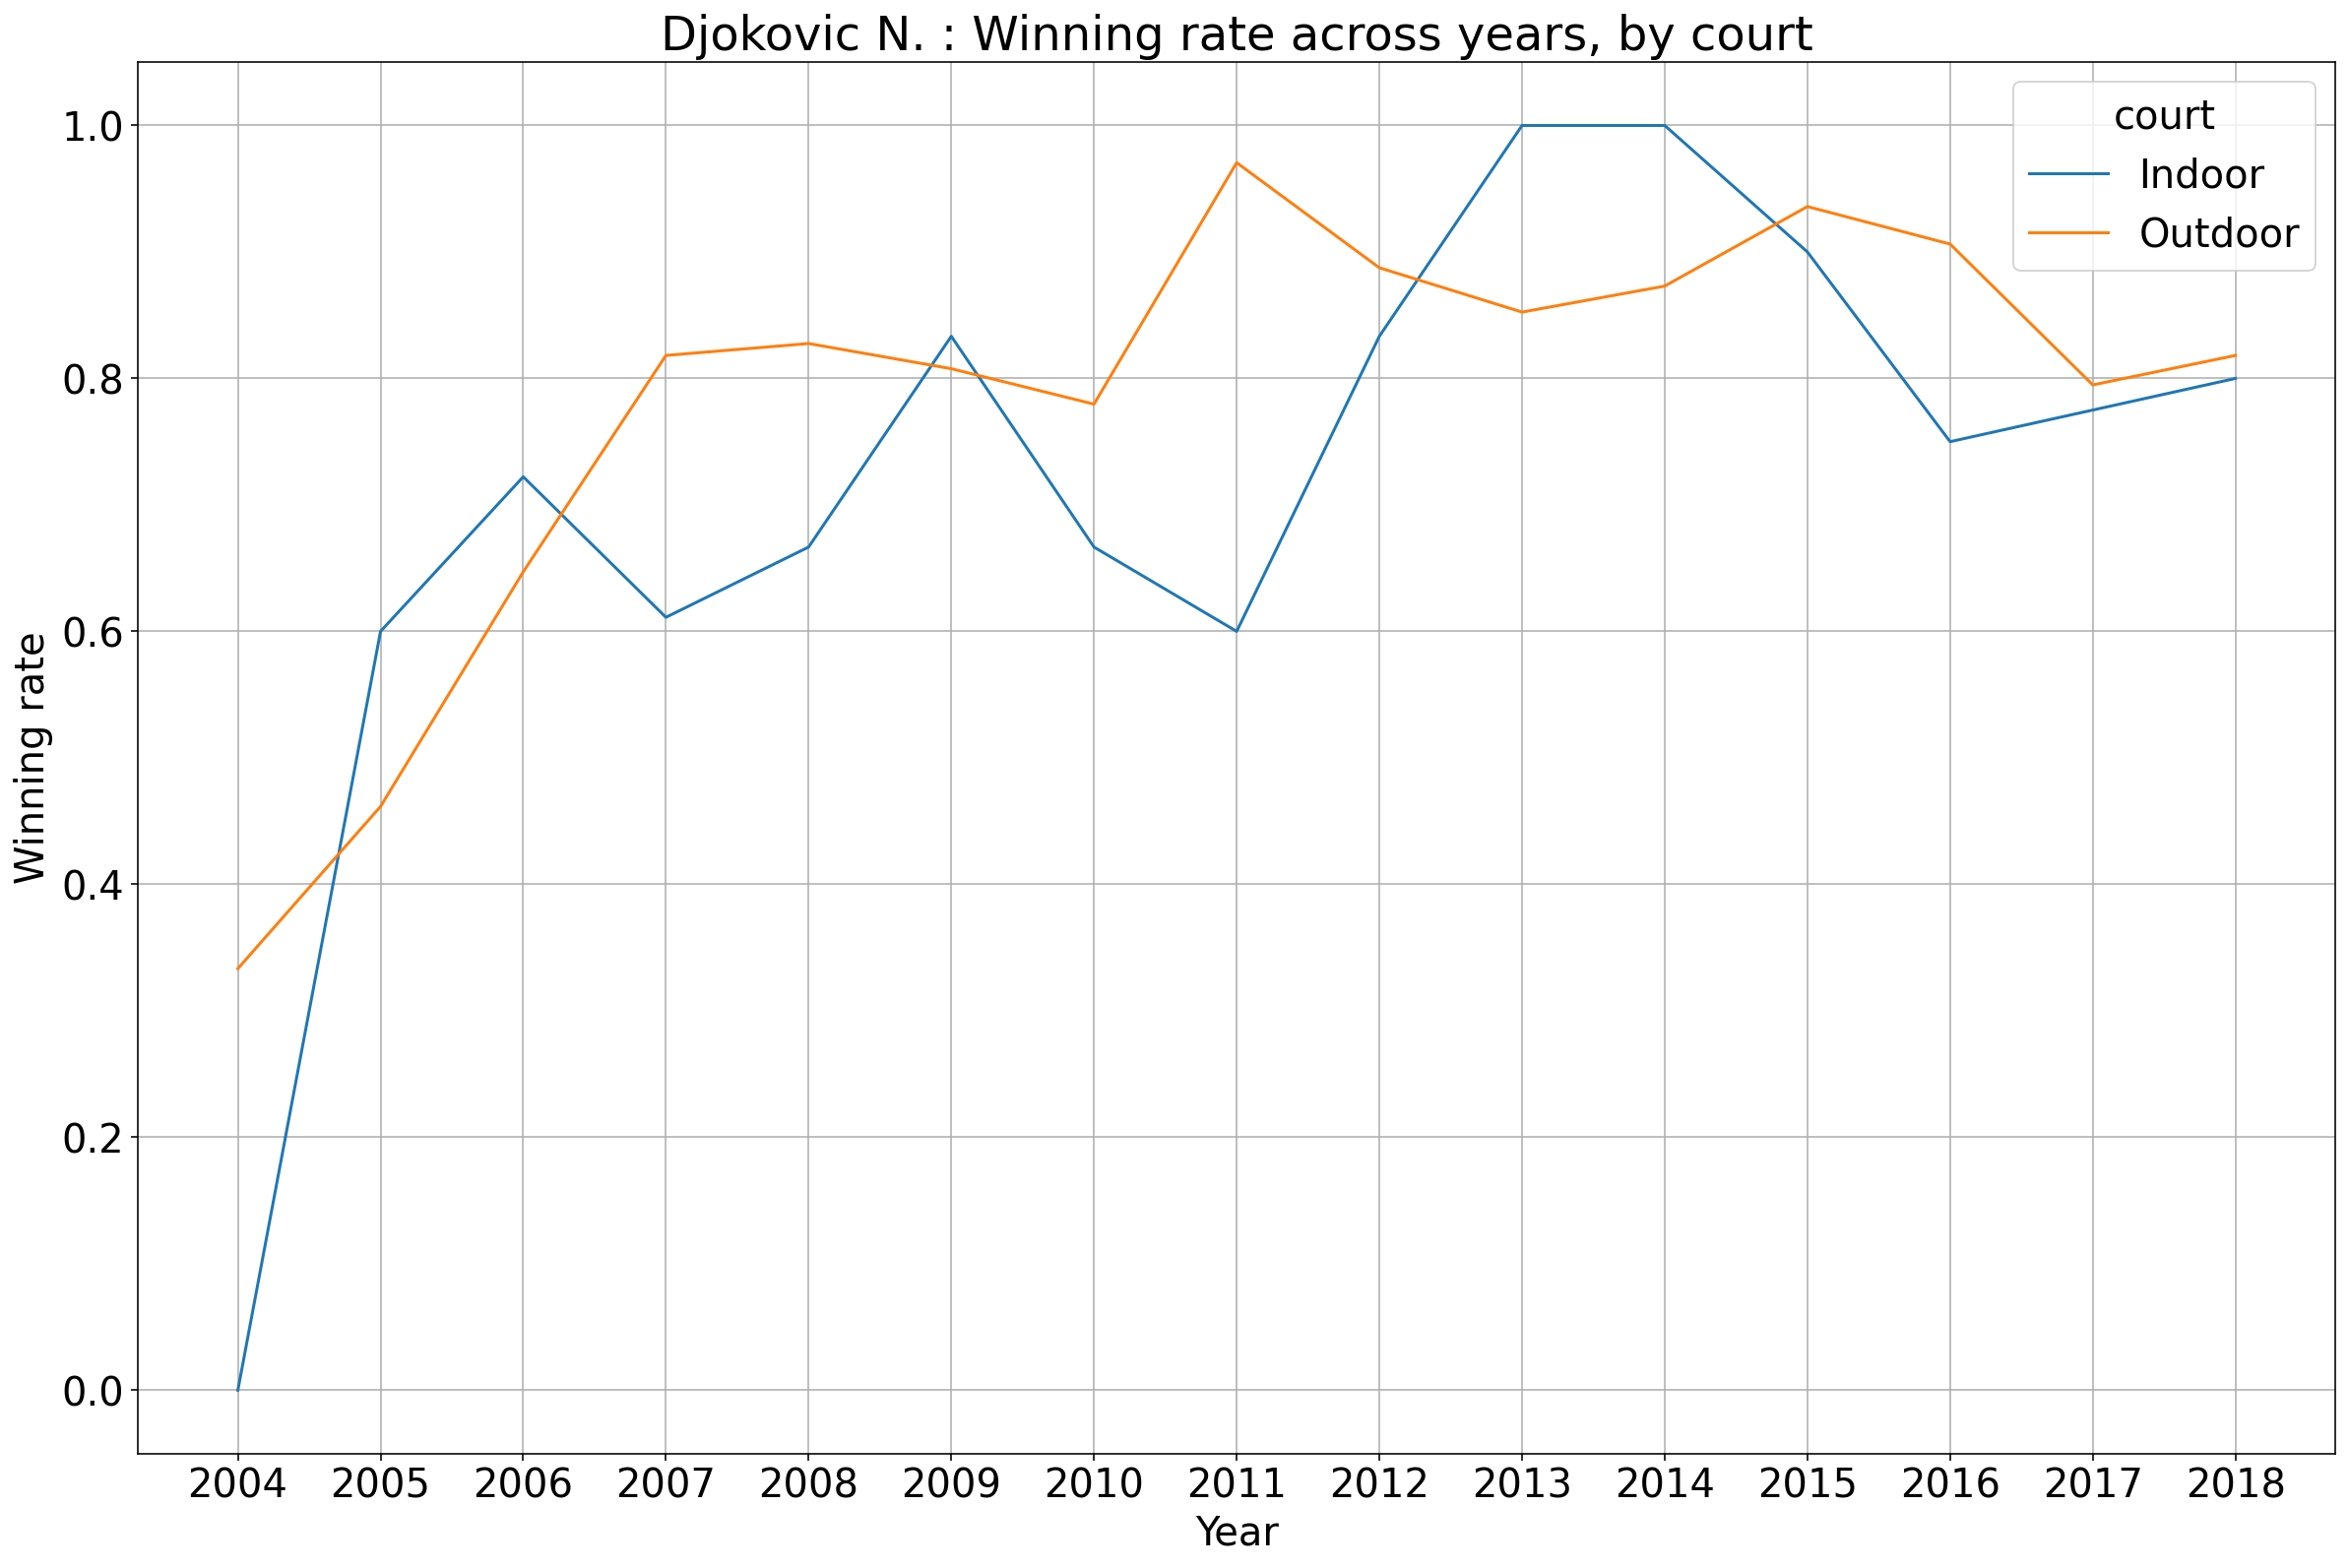

In [40]:
plot3 = sns.lineplot(data=df_atp_player_for_plot,
            x='year',
            y='winning_rate',
            hue='court')

plot3.set_title(f'{player_of_choice} : Winning rate across years, by court')
plot3.set_xlabel('Year')
plot3.set_ylabel('Winning rate')
plot3.grid()


plt.xticks(range(df_atp_player_for_plot['year'].min(),df_atp_player_for_plot['year'].max()+1));

# Despite some differences, especially noticeable in 2011, the winning rates both 
# for Indoor and Outdoor matches increase together for Djokovic N.  

In [41]:
indoor_df = df_atp_player_for_plot[df_atp_player_for_plot['court']=='Indoor'][['year','winning_rate']]
outdoor_df = df_atp_player_for_plot[df_atp_player_for_plot['court']=='Outdoor'][['year','winning_rate']]

indoor_df.rename(columns={'winning_rate':'ind_win_rate'}, inplace=True)
outdoor_df.rename(columns={'winning_rate':'out_win_rate'}, inplace=True)

merged_df = indoor_df.merge(outdoor_df, on='year', how='outer').dropna()

merged_df[['ind_win_rate','out_win_rate']].corr()

# The Indoor and Outdoor winning rates are, in fact, strongly correlated for the Djokovic N.

,ind_win_rate,out_win_rate
ind_win_rate,1.000000,0.736476
out_win_rate,0.736476,1.000000


### 3) I want to look at the contestants who had more matches together overall

In [42]:
# For the df_atp I create a new column with a two elements sorted list with the winner and loser for each match.
# Then I join the two elements of the list for each match.

df_atp['contestants'] = sorted(df_atp[['winner','loser']].values.tolist())

df_atp['contestants'] = df_atp['contestants'].apply(lambda x: ' VS '.join(x)) 

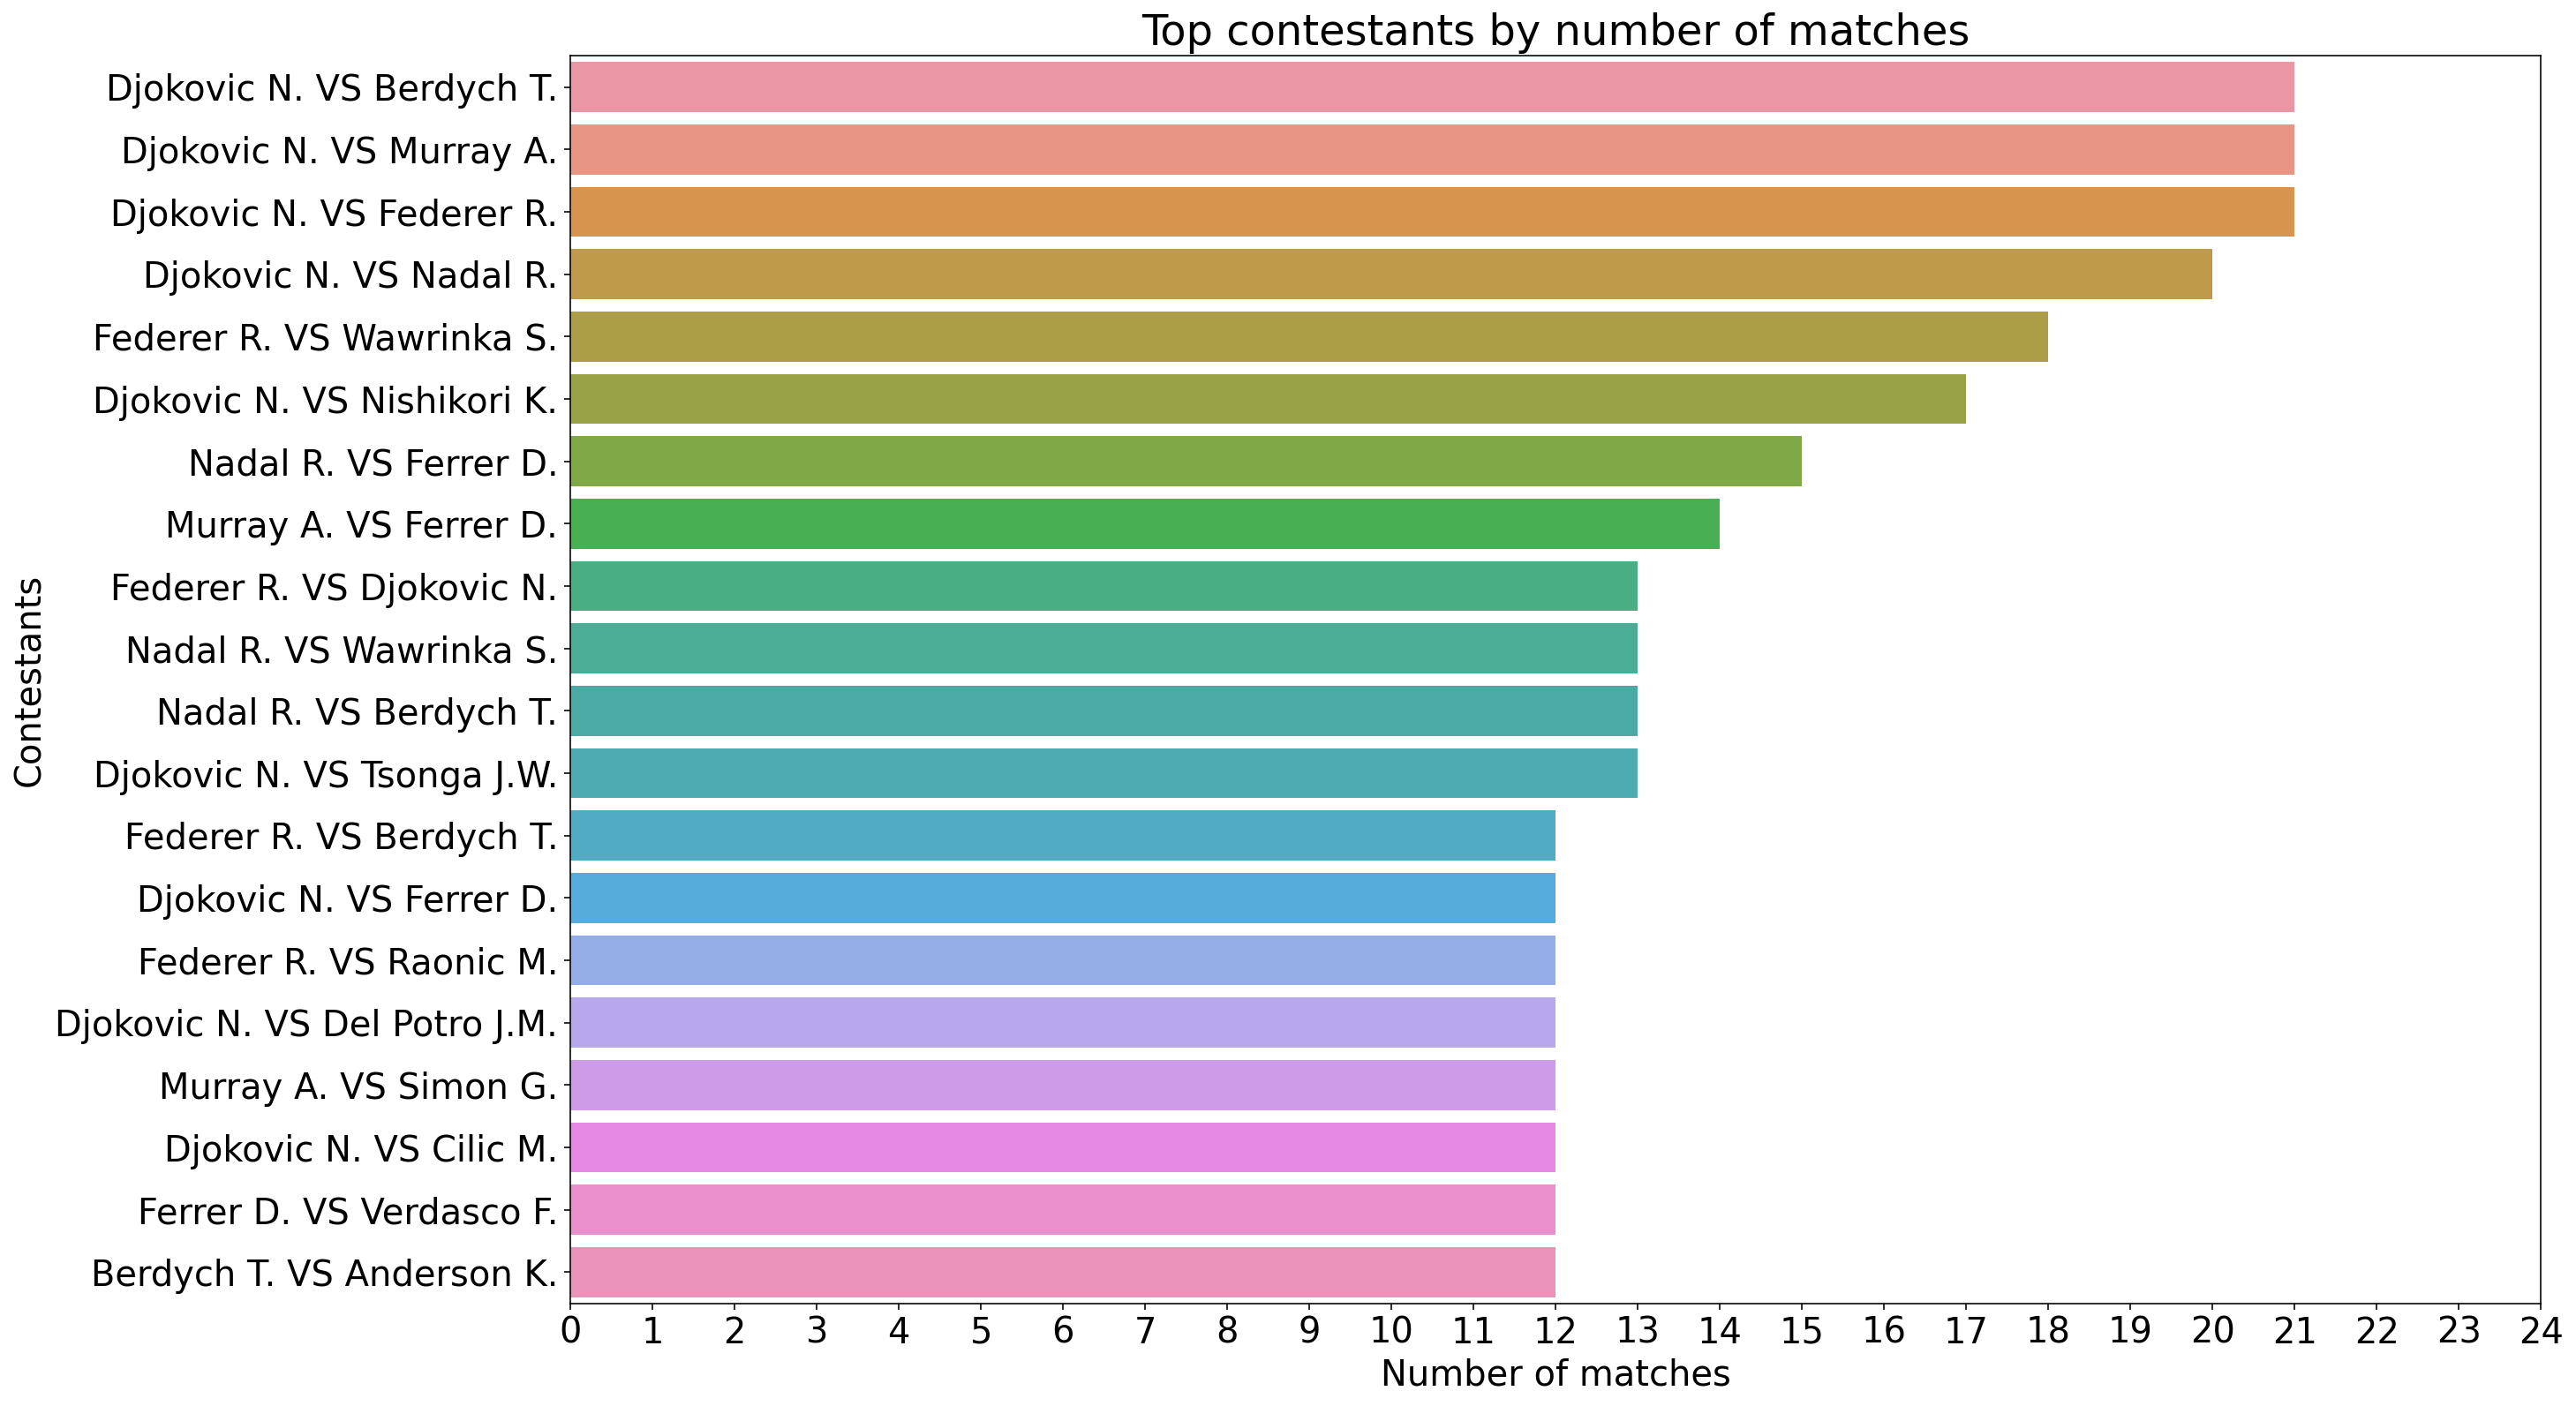

In [43]:
# It appears that Djokovic N. VS Berdych T., Djokovic N. VS Murray A., Djokovic N. VS Federer R. were the 
# contestants that met most of the times.

plot_df = df_atp.groupby('contestants').count()['atp'].sort_values(ascending=False)
plot_df = pd.DataFrame(plot_df.items(), columns=['contestants', 'number_of_matches'])

plot4  = sns.barplot(x="number_of_matches", y="contestants", data=plot_df.head(20))

plot4.set_title('Top contestants by number of matches')
plot4.set_xlabel('Number of matches')
plot4.set_ylabel('Contestants');

plt.xticks(range(0, 25));